# Week 2 (K-means, K-medoids, Gaussian Mixtures)

This week we are going to work with K-means, K-medoids, and Gaussian Mixtures.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Local imports (used for the last optional exercise.)
import math
import itertools
import sys
sys.path.append(".")
from utilities.gmm import GMM
from utilities.load_data import load_iris, load_iris_PC, index_to_feature

## Exercise 1: Warmup
Please provide a brief description of what characterises 
1. Clustering as a task 
2. Representative-based clustering as a clustering approach 

**1. Grouping data into groups where the groups contain the most similar data**

**2. Uses a representitive, e.g. a mean or mediod, that defines the cluster. Also uses a representative for an initial distribution and uses an iterative approach to improve**

## Exercise 2: Practical K-means
Given the following points: 2, 4, 10, 12, 3, 20, 30, 11, 25. Assume $k=3$, and that we randomly pick the initial means $\mu_1=2$, $ \mu_2=4$ and $\mu_3=6$. Show the clusters obtained using K-means algorithm after one iteration, and show the new means for the next iteration.

In [4]:
# You can use python if you want but it is not required!
X = np.array([2, 4, 10, 12, 3, 20, 30, 11, 25])

k_1 = [2, 3]
k_2 = [4]
k_3 = [10, 11, 12, 20, 25, 30]

µ_1 = 2.5
µ_2 = 4
µ_3 = 18

# With the new means, 10 would now be in k_2, and 11 could be in both

## Exercise 3
Which algorithm is more robust: k-means or k-medoid and why? 

**k-mediod since outliers do not affect the representatives as much, as the mediod is a member of the cluster, and doesn't change if we add an outlier**

## Exercise 4: Practical Mixture of Gaussians
Given the data points in table below, and their probability of belonging to two clusters.
Assume that these points were produced by a mixture of two univariate normal distributions. 
Answer the following questions:

1. Find the maximum likelihood estimate of the means $\mu_1$ and $\mu_2$
2. Assume that $\mu_1 = 2$, $\mu_2 = 7$, and $\sigma_1 = \sigma_2 = 1$. Find the probability that the point $x=5$ belongs to cluster $C_1$ and to cluster $C_2$. You may assume that the prior probability of each cluster is equal (i.e., $P(C_1) = P(C_2) = 0.5$), and the prior probability $P(x=5) = 0.029$

|$x$|$P(C_1\mid x)$|$P(C_2\mid x)$|
|:---:|:---:|:---:|
| --- | ---------------- | ---------------- |
|2 |  0.9  |  0.1  |
|3|0.8|0.2|
|7|0.3|0.7|
|9|0.1|0.9|
|2|0.9|0.1|
|1|0.8|0.2|


In [20]:
# If you want, you can use python here.
# Note that there is a
X            = np.array([2, 3, 7, 9, 2, 1])
P_C1_given_x = np.array([0.9, 0.8, 0.3, 0.1, 0.9, 0.8])
P_C2_given_x = 1 - P_C1_given_x

# 1
C1 = np.divide(np.sum(np.multiply(X, P_C1_given_x)), np.sum(P_C1_given_x))
C2 = np.divide(np.sum(np.multiply(X, P_C2_given_x)), np.sum(P_C2_given_x))
µ1 = np.mean(C1)
µ2 = np.mean(C2)


print(f"MLE of mean 1:{µ1}")
print(f"MLE of mean 2:{µ2}")

# 2
norm_1 = norm.pdf(5, 2, 1)
print("Probability of point being in c1:", (norm_1 * 0.5) / 0.029)

norm_2 = norm.pdf(5, 7, 1)
print("Probability of point being in c2:", (norm_2 * 0.5) / 0.029)



MLE of mean 1:2.5789473684210535
MLE of mean 2:6.454545454545453
Probability of point being in c1: 0.07641117951617254
Probability of point being in c2: 0.930878732986001


## Exercise 5
For which parameter $\mu,\Sigma,P(C)$ settings is EM clustering identical to k-means clustering and why?<br>
Mean $\mu_i = \frac{{\sum_{j=1}^{n}{x_j} w_{ij}}}{\sum_{j=1}^{n}{w_{ij}}}$<br>
Covariance $\Sigma_i = \frac{\sum_{j=1}^{n}w_{ij}(x_j - \mu_i)(x_j - \mu_i)^\top}{\sum_{j=1}^{n} w_{ij}}$<br>
Prior $P(c_i) = \frac{\sum_{j=1}^{n}w_{ij}}{n}$<br>

**Something with mean being centroid** 

## Exercise 6: 2d K-means and gaussian mixture
Given the two-dimensional points in Table 13.2, assume that $k=2$, and that initially the points are assigned to clusters as follors: $C_1 = \{ x_1, x_2, x_4 \}$ and $C_2 = \{ x_3, x_5 \}$.
Answer the following questions:

1. Apply the K-means algorithm until convergence, that is, the clusters do not change, assuming (1) the usual Euclidean distance of the $L_2$-norm as the distance between points, defined as

$$
||x_i - x_j||_2 = \sqrt{ \sum_{a=1}^d (x_{ia} - x_{ja})^2 }
$$
 and (2) the Manhattan distance of the $L_1$-norm
$$
||x_i - x_j||_1 = \sum_{a=1}^d |x_{ia} - x_{ja}|.
$$

2. Apply the EM algorithm with $k=2$ assuming that the dimensions are independent. Show one complete execution of the expectation and the maximization steps. Start with the assumption that $P(C_i | x_{ja}) = 0.5$ for $a=1, 2$ and $j=1, ..., 5$.


![Table 13.2](graphics/13.2.png)

/home/viktorsalling/miniconda3/envs/dm23/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/viktorsalling/miniconda3/envs/dm23/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


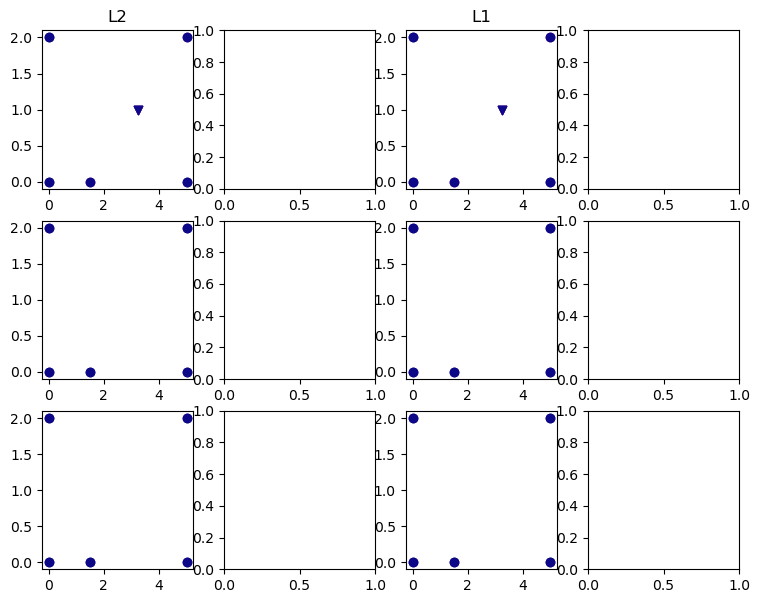

In [30]:
# Again, if you want, you can use a bit of Python
X = np.array([
    [0, 0, 1.5, 5, 5],
    [2, 0,   0, 0, 2]
]).T # shape [5, 2]
from matplotlib import cm
colormap = cm.get_cmap('plasma')
colors = colormap([0., 0.3, 0.6])
iterations = 3

def plot(ax, i, j, X, mu, clusters):
    K = np.max(clusters)+1
    for k in range(K):
        ax[i, j].scatter(*(X[clusters==k].T), c=[colors[k]])
        ax[i, j].scatter([mu[k, 0]], [mu[k,1]], c=[colors[k]], marker='v')
        
        

def kmeans(dit_fn, minimize_fn, axes, iterations=iterations, k=2):
    clusters = np.array([0,0,1,0,1])
    for i in range(iterations):
        mu = np.array([minimize_fn(X[clusters==1], axis=0) for i in range(k)])
        plot(axes, i, 0, X, mu, clusters)
        
        dists = np.array([[dit_fn(mui, x) for mui in mu] for x in X])
        clusters = np.argmin(dists, axis=1)
        plot(axes, i, 0, X, mu, clusters)

L2_norm = lambda x,y: np.sqrt(((x-y)**2).sum())
L1_norm = lambda x, y: np.sum(np.abs(x-y))

fig, ax = plt.subplots(iterations, 4, figsize=[9, 7])
ax[0, 0].set_title("L2")
ax[0, 2].set_title("L1")

kmeans(L2_norm, np.mean, ax[:,:2])
kmeans(L1_norm, np.mean, ax[:, 2:])

# Optionals
## Exercise 7
Consider 2D data (2,2), (2,1), (2,3), (1,2), (3,2), (8,2), (8,1), (8,0), (8,3), (8,4), (7,2), (6,2), (9,2), (10,2), (7,1), (7,3), (9,1), (9,3)  

![Data plotted](graphics/two_cluster_dataplot.png)

1. let k=2 and sketch visually what you think the final clustering will be and explain why. 
2. Does the initialization influence the final clustering? And why?

## Exercise 8: K-means and the Iris dataset

In this exercise, we will apply K-means to the two 2PC dataset from [Zaki] (and slides from Week 2).
You may use the code below as inspiration.

C:\Users\au647909\OneDrive - Aarhus universitet\Skrivebord\dm2023-solutions\exercises\utilities/data/iris-PC.txt


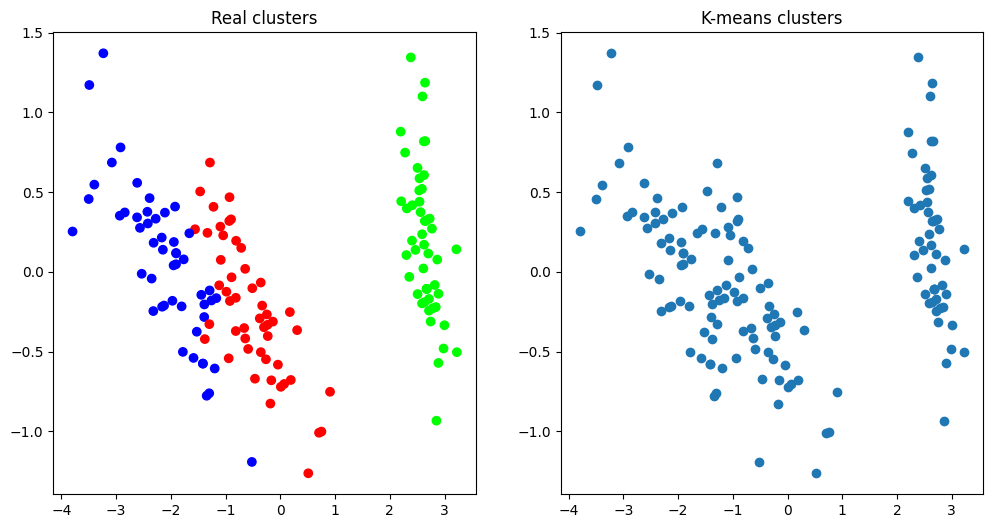

In [26]:
X, y = load_iris_PC()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(*(X.T), c=y)
ax[0].set_title("Real clusters")

def kmeans(X, k):
    """
        Arguments:
            k: int specifying number of clusters
            X: numpy array with data
        Returns:
            clusters: Array of indicators (ints) indicating the cluster of each point. Shape: [n,]
    """
    n, d = X.shape
    clusters = None 
    new_clusters = None
    centroids = np.random.randn(k, d) # K clusters of shape d
    
    while clusters is None or (not np.allclose(clusters, new_clusters)):
        clusters = None # TODO assign points to clusters
        centroids = None # TODO reassign centroids
        break # Remove this. It is to prevent you getting an infinite loop if you try to run the code before modifying it
        
    return clusters

clusters = kmeans(X, 3)
ax[1].scatter(*(X.T), c=clusters)
ax[1].set_title("K-means clusters")
plt.show()


## Exercise 9: Gaussian Mixtures and the EM-Algorithm
In this exercise, we will implement the EM-algorithm for the Gaussian Mixture Model.
You can consult [Zaki] Section 13.3.2, for a description of how the algorithm works in this particular setup.

Below is an extension of a Gaussian Mixture Model stub (`GMM`) found [here](../utilities/gmm.py), which has the method signatures for the unimplemented functions. Try to fill out the methods and run the experiment below afterwards.

Besides the methods shown here, the `GMM` class has both a `fit` and a `predict` method, which both takes as input the data and returns `void` and cluster indexes, respectively. Both will use the functions that you implement below. Additionally, the number of gaussian mixtures `K` can be accessesed by `self.K`.

Finally, the `GMM` class has a static function `prob`, which returns the values of a Gaussian pdf, given data, mean, and covariance matrix; use it if you please.

In [41]:
class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for mu, Sigma, and pi.
            
            The function corresponds to line 2-4 in Algorithm 13.3 in [Zaki, p. 349]
            Note, that K can be retrieved as `self.K`.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size     [K, d, d]
                    pi has size        [K]
        """
        # TODO: what should the values be for initializing mu, Sigma and pi
        return mu, Sigma, pi

    def prior(self):
        return self.pi    
    

    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(Y|X)

            This function corresponds to line 8 in Algorithm 13.3 in [Zaki, p. 349]
            Note, that mean and covariance matrices can be accessed by `self.mu` and `self.Sigma`, respectively.
            
            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """
        # TODO: what is the posterior probability?
        
        return posterior
        

    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the data `X` and the current
            posterior probabilities `P`.

            This function corresponds to line 10-12 in Algorithm 13.3 and Eqn. (13.11-13) in [Zaki, p. 349].
            
            Args:
                X (matrix, [n, d]): Data matrix
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what is the values of mu, Sigma, and pi that maximizes the expectation given the posterior?
        return  mu_hat, Si_hat, pi_hat


In [ ]:
# Let's plot the data used for the experiments to see the actual classes 
def plot_iris(X, y, title=''):
    # Plotting
    _, d = X.shape
    
    combinations = list(itertools.combinations(np.arange(d), 2))
    
    cols    = min(3, len(combinations) )
    rows    = math.ceil(len(combinations)/cols)
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    
    if len(title) > 0: fig.suptitle(title)
    
    # Fix indexing when there are few plots.
    if rows == 1: ax = [ax]
    if cols == 1: ax = [ax]

    c       = 0
    for i, j in combinations:
        m = c // cols
        n = c % cols
        ax[m][n].scatter(X[:,i], X[:,j], c=y)
        ax[m][n].set_xlabel(index_to_feature[i])
        ax[m][n].set_ylabel(index_to_feature[j])
        c += 1 
    # fig.tight_layout()

# Load the Iris data set
X , y    = load_iris()
X_, y_   = load_iris_PC()

plot_iris(X, y, 'Iris')
plot_iris(X_, y_, 'Iris 2 Principal Components')

The code below runs your implementation of the GMM on the simple 2D Iris data and plots it.

In [ ]:
# Tiny experiment 2PC
K       = 3
gmm     = MyGMM(K)
gmm.fit(X_, max_iter=100)

plot_iris(X_, y_, 'Real labels')
plot_iris(X_, gmm.predict(X_), "Labels from GMM model")

The code below runs your implementation of the GMM on the full 4D Iris data.

In [ ]:
# All four dimensions iris
K       = 3
gmm     = MyGMM(K)
gmm.fit(X, max_iter=100)
plot_iris(X, y, 'Real labels')
plot_iris(X, gmm.predict(X), "Labels from GMM model")